In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 16, 12


from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [68]:
file = 'train.csv'
data = pd.read_csv(file)

In [69]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [70]:
y = data['Survived']

In [71]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [73]:
x = data

In [74]:
del x['Survived']
del x['Name']
del x['Ticket']
del x['Cabin']
del x['PassengerId']

In [75]:
x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S


In [76]:
x.describe()

/home/rahul/projects/kaggle/venv/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,NaN,0.000000,0.000000,7.910400
50%,3.000000,NaN,0.000000,0.000000,14.454200
75%,3.000000,NaN,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
x['Age'] = x['Age'].fillna(1)
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,23.997946,0.523008,0.381594,32.204208,1.538721
std,0.836071,0.477990,17.329598,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [96]:
labelsex = LabelEncoder()
labelemb = LabelEncoder()
x['Sex'] = labelsex.fit_transform(x['Sex'])

#data['Embarked'].dtype
x['Embarked'] = x['Embarked'].astype(str)
x['Embarked'] = labelemb.fit_transform(x['Embarked'])
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
5,3,1,1.0,0,0,8.4583,1
6,1,1,54.0,0,0,51.8625,2
7,3,1,2.0,3,1,21.0750,2
8,3,0,27.0,0,2,11.1333,2
9,2,0,14.0,1,0,30.0708,0


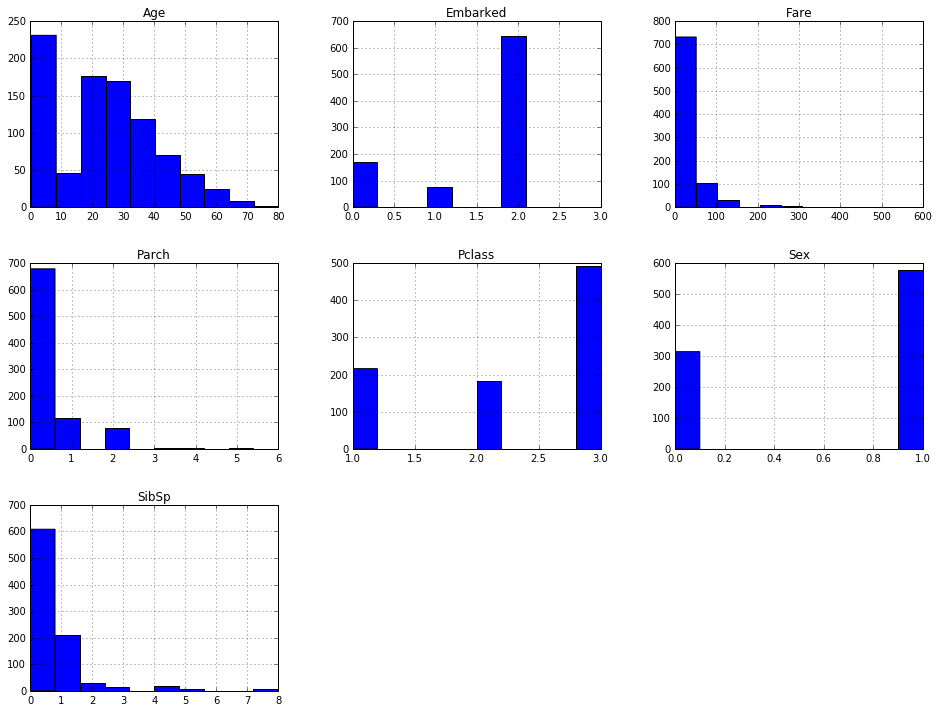

In [79]:
x.hist()
plt.show()

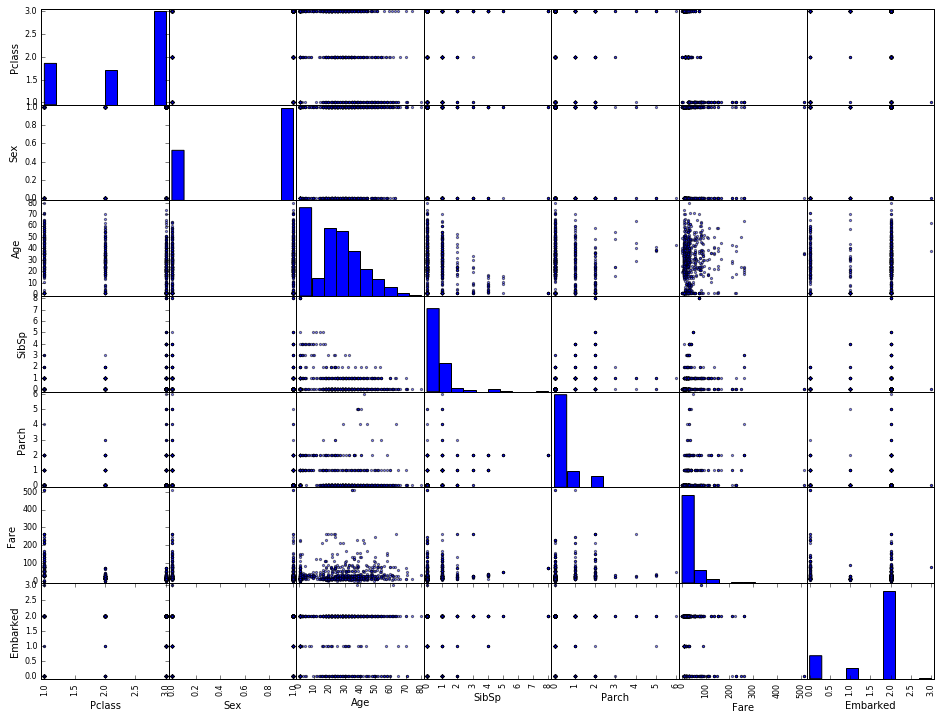

In [80]:
scatter_matrix(x)
plt.show()

In [81]:
# Prepare Data

# Split-out validation dataset
#array = dataset.values
#X = array[:,0:8]
#Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(x, y, test_size=validation_size, 
                                                                                 random_state=seed)

In [82]:

# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [83]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.807629 (0.042392)
LDA: 0.797848 (0.041671)
KNN: 0.670246 (0.083050)
CART: 0.766980 (0.058644)
NB: 0.796362 (0.053434)
SVM: 0.682903 (0.097260)
XGB: 0.820364 (0.045458)


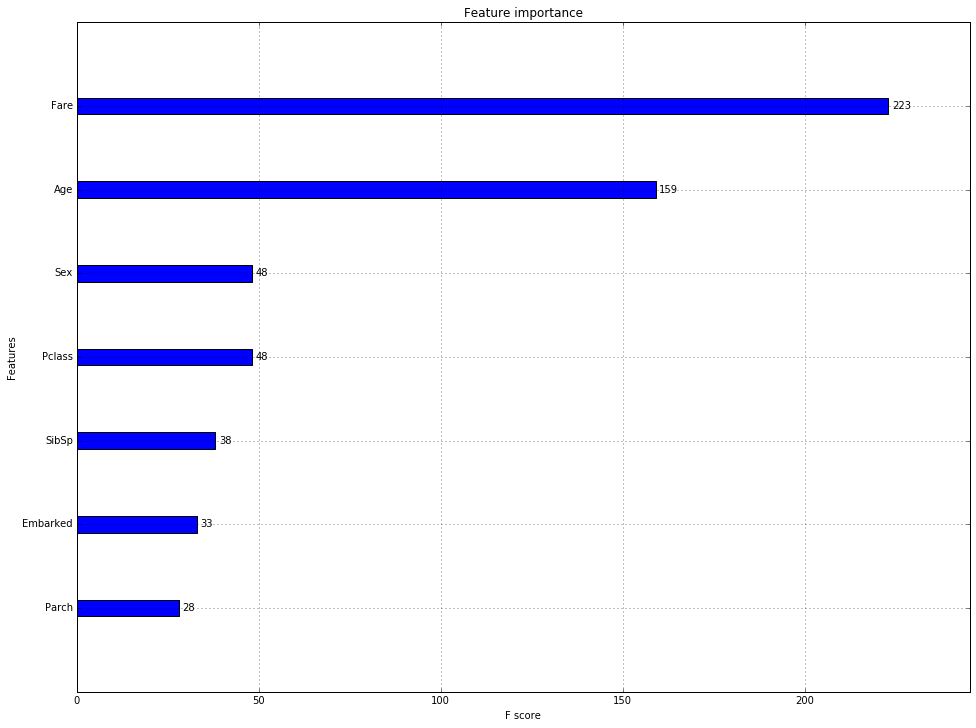

In [84]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_validation)
plot_importance(xgb)
plt.show()

In [88]:
#thresholds = np.sort(xgb.feature_importances_)
#print(xgb.feature_names)

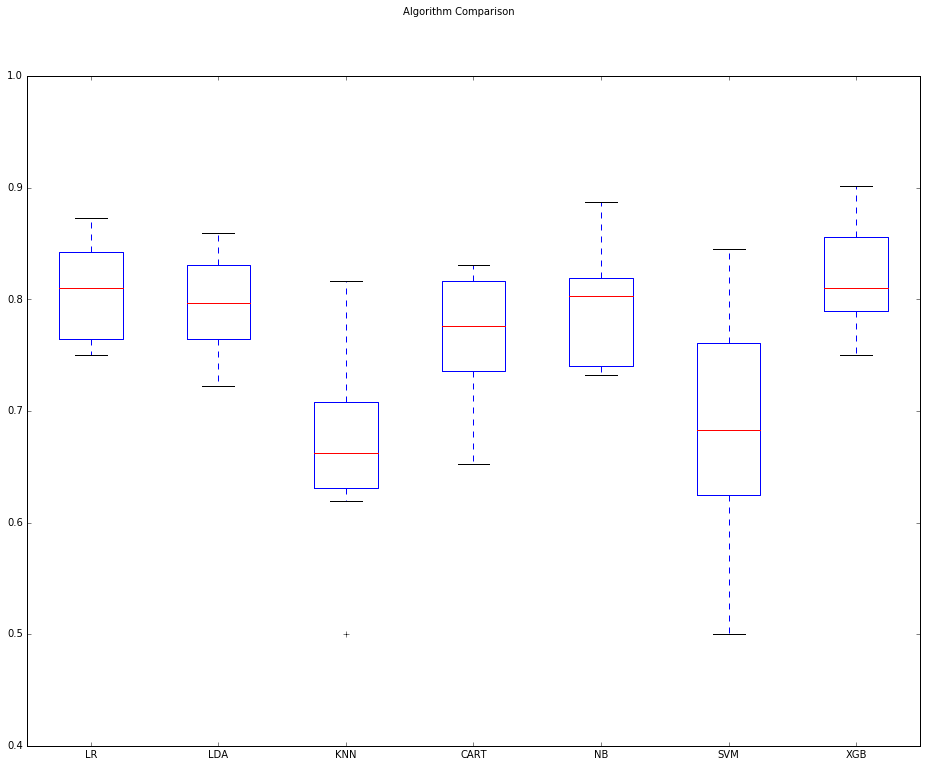

In [89]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [90]:

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))
results = []
names = []
for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.795012 (0.041876)
ScaledLDA: 0.797848 (0.041671)
ScaledKNN: 0.824648 (0.066989)
ScaledCART: 0.762735 (0.056878)
ScaledNB: 0.796362 (0.053434)
ScaledSVM: 0.841354 (0.053455)
ScaledXGB: 0.820364 (0.045458)


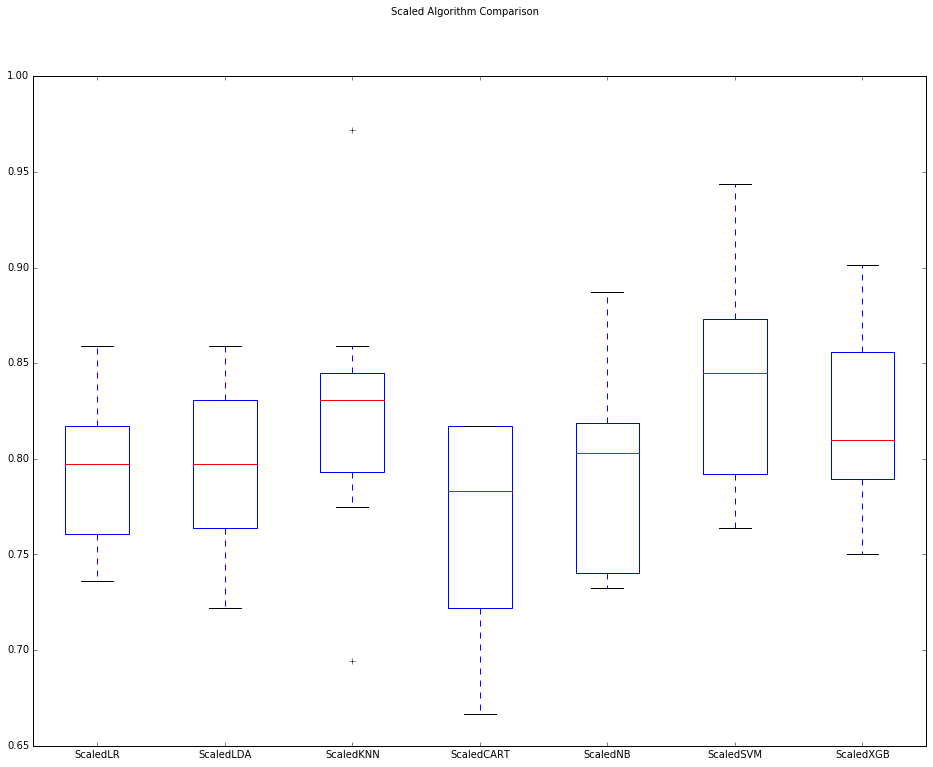

In [91]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [92]:

# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('XGB', XGBClassifier())])))
results = []
names = []
for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.800665 (0.044661)
ScaledLDA: 0.797848 (0.041671)
ScaledKNN: 0.817586 (0.059928)
ScaledCART: 0.761326 (0.047290)
ScaledNB: 0.796362 (0.053434)
ScaledSVM: 0.802054 (0.043283)
ScaledXGB: 0.824550 (0.046685)


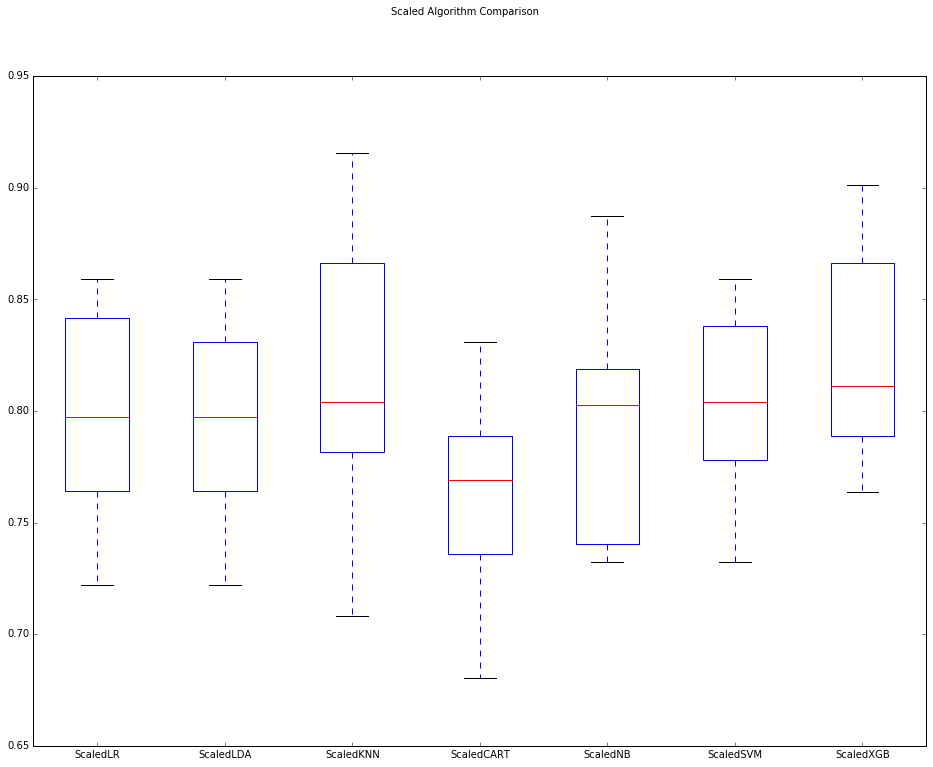

In [93]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [94]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.807688 (0.053540)
ScaledGBM: 0.823103 (0.051990)
ScaledRF: 0.818995 (0.065671)
ScaledET: 0.807688 (0.051354)
ScaledXGB: 0.820364 (0.045458)


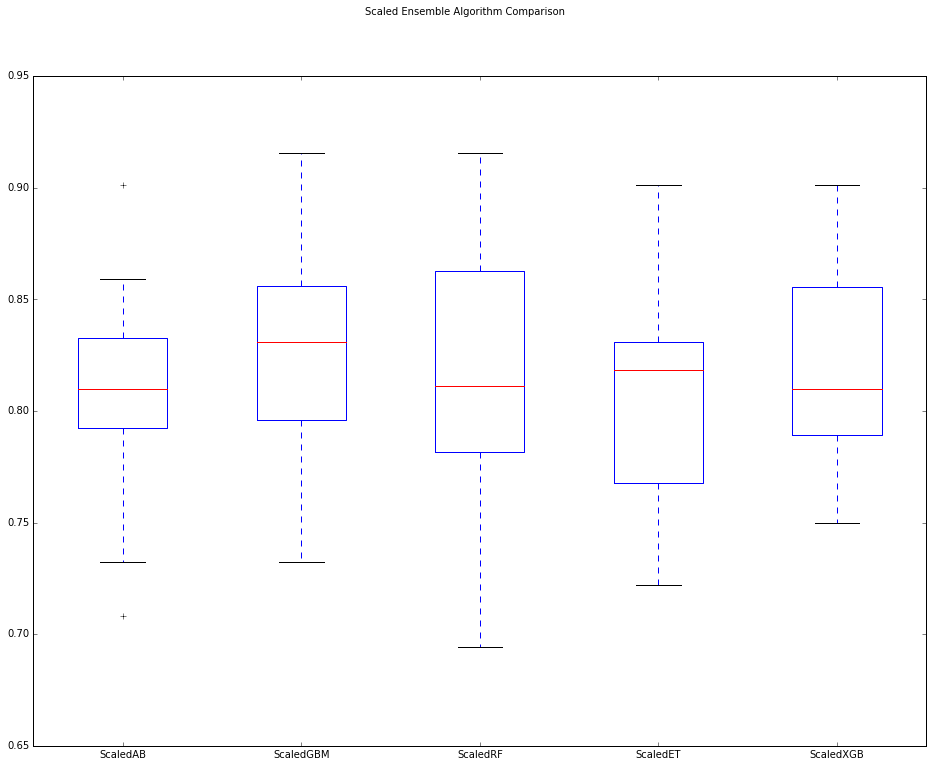

In [95]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()